## 📌 Dataset Columns Description

Below is a detailed description of each column in the dataset:

| Column Name     | Description |
|-----------------|-------------|
| **name**        | The name/model of the car (e.g., Maruti Swift, Hyundai i20). |
| **year**        | The manufacturing year of the car. Helps determine age and depreciation. |
| **selling_price** | The price at which the car is being sold (target variable for prediction). |
| **km_driven**   | Total kilometers the car has been driven. Indicates usage and wear. |
| **fuel**        | Type of fuel used by the car (e.g., Petrol, Diesel, CNG). |
| **seller_type** | Who is selling the car — Dealer, Individual, etc. |
| **transmission** | Type of transmission — Manual or Automatic. |
| **owner**       | Ownership history (e.g., First Owner, Second Owner, etc.). |

# Importing libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [42]:
df = pd.read_csv('car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,NaN,70000.0,Petrrol,NaN,Manual,First Owner
1,Maruti Wagon R LXI Minor,NaN,135000.0,50000.0,Petorl,Indvidual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Deisel,Indvidual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petorl,Indivudal,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Diesl,Indivudal,Manual,Second Owner


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4017 non-null   object 
 1   year           4041 non-null   float64
 2   selling_price  4054 non-null   float64
 3   km_driven      4026 non-null   object 
 4   fuel           4042 non-null   object 
 5   seller_type    4056 non-null   object 
 6   transmission   4040 non-null   object 
 7   owner          4059 non-null   object 
dtypes: float64(2), object(6)
memory usage: 271.7+ KB


In [44]:
df.duplicated().sum()

112

# Normalizing the data

In [45]:
# Normalizing fuel column
df["fuel"] = df["fuel"].replace(["Petrrol","Petorl","Petrl"],"Petrol")
df["fuel"] = df["fuel"].replace(["Diesl","Deisel"],"Diesel")
df["fuel"]

0       Petrol
1       Petrol
2       Diesel
3       Petrol
4       Diesel
         ...  
4340       NaN
4341       NaN
4342    Petrol
4343    Diesel
4344    Diesel
Name: fuel, Length: 4345, dtype: object

In [46]:
# check contents
df["fuel"].value_counts()

fuel
Diesel      2000
Petrol      1978
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [47]:
# Normalizing seller_type column
df["seller_type"] = df["seller_type"].replace(["Indivudal","Indvidual"],"Individual")
df["seller_type"] = df["seller_type"].replace(["Deelar","Dealerr"],"Dealer")
df["seller_type"]

0              NaN
1       Individual
2       Individual
3       Individual
4       Individual
           ...    
4340    Individual
4341    Individual
4342    Individual
4343    Individual
4344    Individual
Name: seller_type, Length: 4345, dtype: object

In [48]:
# check contents
df["seller_type"].value_counts()

seller_type
Individual          3034
Dealer               928
Trustmark Dealer      94
Name: count, dtype: int64

# Handling duplicated values

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.duplicated().sum()

0

# Handle Missing Values

In [51]:
# Handle Missing Values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Drop rows where 'name' is missing (assuming it's a key identifier)
df = df.dropna(subset=['name'])

# Convert numerical columns to numeric, coercing errors to NaN
# This handles cases where strings might be present in numeric columns
for col in ['year', 'selling_price', 'km_driven']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute numerical columns with median
for col in ['year', 'selling_price', 'km_driven']:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    df[col] = df[col].fillna(df[col].mode()[0])


Missing values before cleaning:
name             326
year             301
selling_price    288
km_driven        316
fuel             299
seller_type      287
transmission     298
owner            281
dtype: int64


# Type Conversion

In [52]:
df['year'] = df['year'].astype(int)
df['selling_price'] = df['selling_price'].astype(float)
df['km_driven'] = df['km_driven'].astype(float)

# Remove Outliers / Invalid Data

In [53]:
# Remove Outliers / Invalid Data
print(f"Shape before outlier removal: {df.shape}")

# Year: 1980 to 2025
df = df[(df['year'] >= 1980) & (df['year'] <= 2025)]

# Selling Price: > 0
df = df[df['selling_price'] > 0]

# KM Driven: < 2,000,000 (2 million km seems like a safe upper bound for a car)
df = df[df['km_driven'] < 2000000]

print(f"Shape after outlier removal: {df.shape}")

print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nUnique values in categorical columns after cleaning:")
print("Fuel:", df['fuel'].unique())
print("Seller Type:", df['seller_type'].unique())
print("Transmission:", df['transmission'].unique())
print("Owner:", df['owner'].unique())

Shape before outlier removal: (3706, 8)
Shape after outlier removal: (3694, 8)

Missing values after cleaning:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Unique values in categorical columns after cleaning:
Fuel: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Seller Type: ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission: ['Manual' 'Automatic']
Owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


# EDA - Summary Statistics

In [54]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,350000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2014,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4334,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2014,600000.0,170000.0,Diesel,Individual,Manual,First Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999.0,80000.0,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000.0,83000.0,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000.0,Diesel,Individual,Manual,First Owner


In [55]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,350000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2014,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3694 non-null   object 
 1   year           3694 non-null   int32  
 2   selling_price  3694 non-null   float64
 3   km_driven      3694 non-null   float64
 4   fuel           3694 non-null   object 
 5   seller_type    3694 non-null   object 
 6   transmission   3694 non-null   object 
 7   owner          3694 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 245.3+ KB


In [57]:
df_numeric = df.select_dtypes(include=['int64', 'int32', 'float64'])
df_numeric.drop('year',axis=1,inplace=True)
df_numeric

,selling_price,km_driven
0,350000.0,70000.0
1,135000.0,50000.0
2,600000.0,100000.0
3,250000.0,46000.0
4,450000.0,141000.0
...,...,...
4334,600000.0,170000.0
4336,409999.0,80000.0
4337,110000.0,83000.0
4338,865000.0,90000.0


In [58]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,3694.0,475807.927721,524810.811802,20000.0,211250.0,350000.0,573750.0,8900000.0
km_driven,3694.0,67188.784786,45489.117859,1.0,39222.5,60000.0,90000.0,806599.0


# EDA - Univariate Analysis

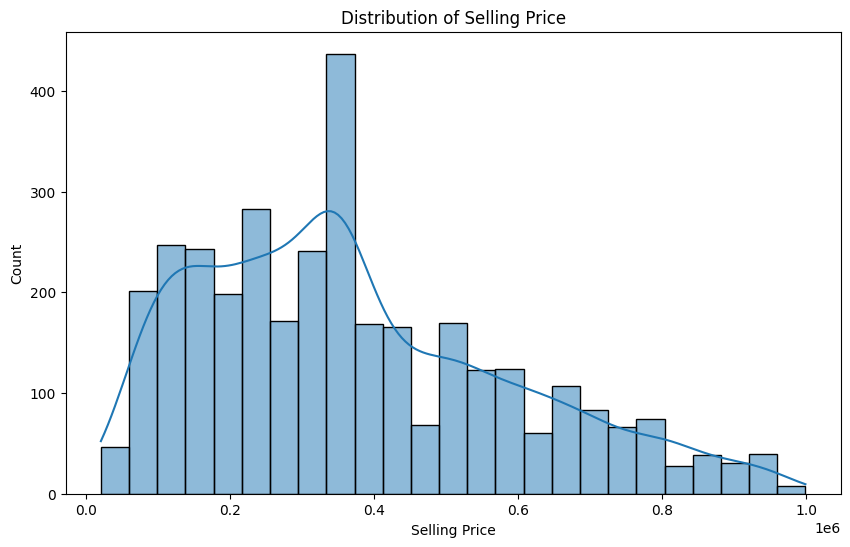

In [70]:
# Distribution of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.savefig('plots/selling_price_dist.png')
plt.show()
plt.close()

### **Selling Price Distribution**
- Prices are right-skewed, with most cars priced in the lower–mid range.  
- A long tail toward higher prices indicates presence of premium/outlier vehicles.  
- Log transformation may help normalize the distribution for modeling.


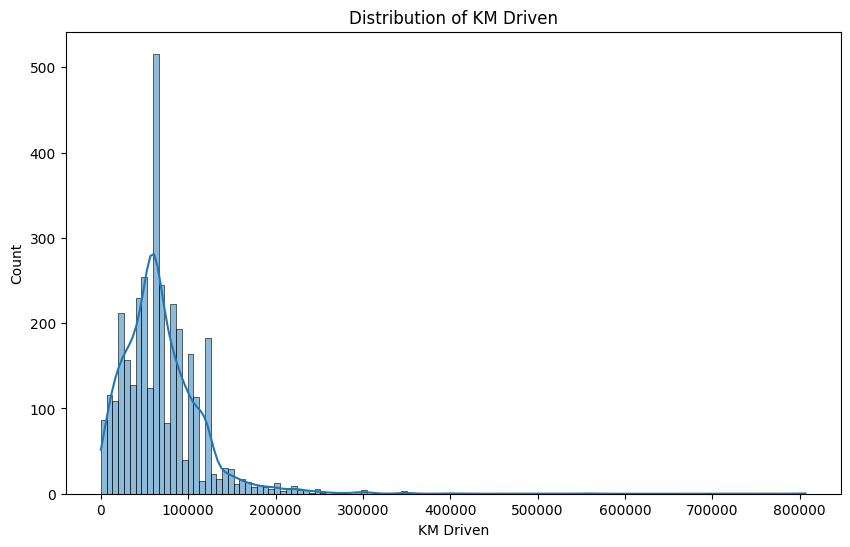

In [71]:
# Distribution of KM Driven
plt.figure(figsize=(10, 6))
sns.histplot(df['km_driven'], kde=True)
plt.title('Distribution of KM Driven')
plt.xlabel('KM Driven')
plt.savefig('plots/km_driven_dist.png')
plt.show()
plt.close()

### **KM Driven Distribution**
- Strong right-skew: most cars fall under ~150,000 km, with very few extreme high-mileage outliers.  
- Indicates typical used-car mileage patterns, with rare long-distance vehicles stretching the tail.  
- Consider capping or transforming the feature to reduce outlier impact in models.

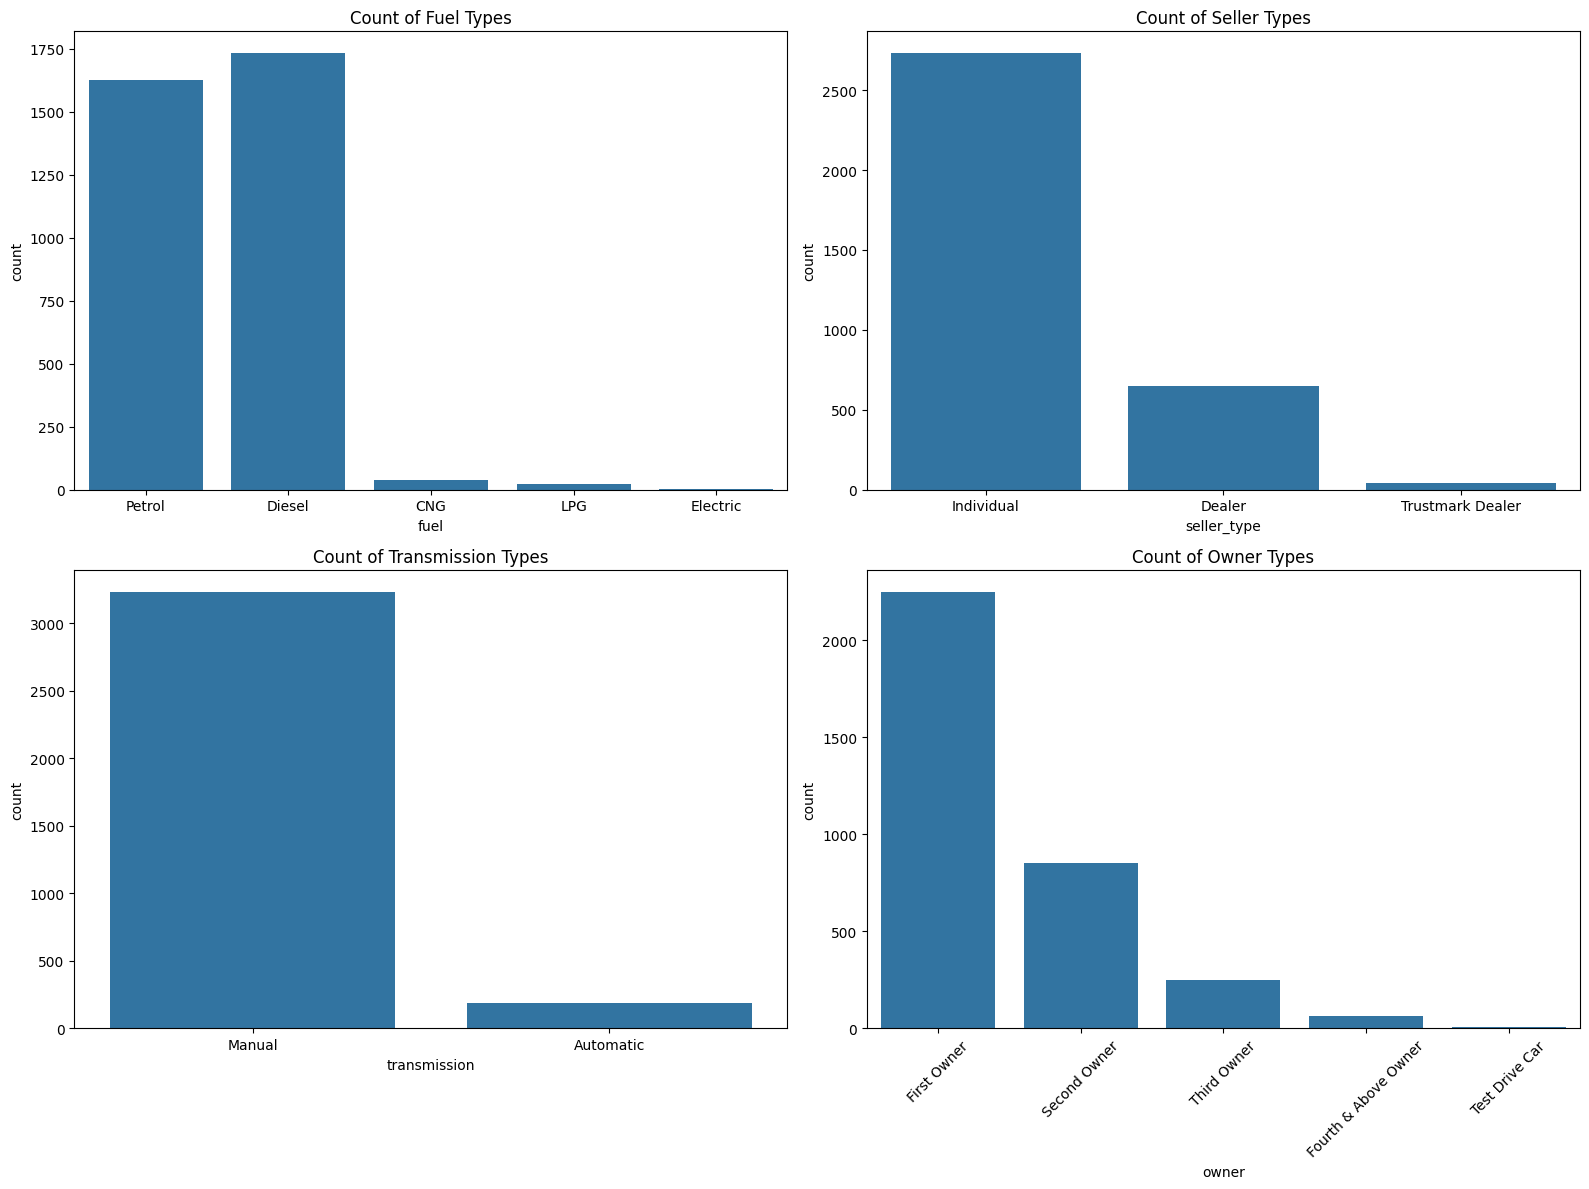

In [ ]:
# Count plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(x='fuel', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Count of Fuel Types')

sns.countplot(x='seller_type', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Count of Seller Types')

sns.countplot(x='transmission', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Count of Transmission Types')

sns.countplot(x='owner', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Count of Owner Types')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('plots/categorical_counts.png')
plt.show()
plt.close()

### **Fuel Types**
- Petrol and Diesel dominate; alternative fuels are almost negligible.  
- Dataset is heavily skewed toward traditional combustion vehicles.

### **Seller Types**
- Most listings come from Individual sellers; Dealers are far fewer.  
- Trustmark Dealers are extremely rare and offer limited analytical value.

### **Transmission Types**
- Manual transmission dominates the dataset; Automatics are a small minority.  
- Any model using this feature will be highly imbalanced toward Manual.

### **Owner Types**
- Majority of cars are First Owner, followed by Second Owner.  
- Higher-owner categories are very rare, indicating strong class imbalance.


# EDA - Bivariate Analysis

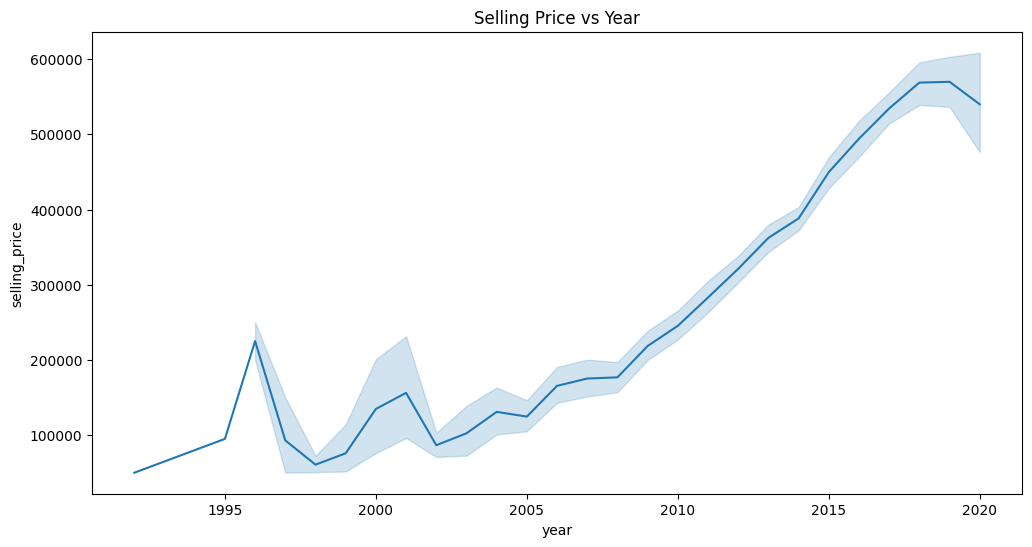

In [72]:
# Selling Price vs Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs Year')
plt.savefig('plots/price_vs_year.png')
plt.show()
plt.close()

### **Selling Price vs Year**
- Clear upward trend: newer cars consistently sell for higher prices.  
- Older years show higher variability, likely due to fewer data points or mixed car conditions.  
- Pattern confirms strong negative correlation between car age and selling price.

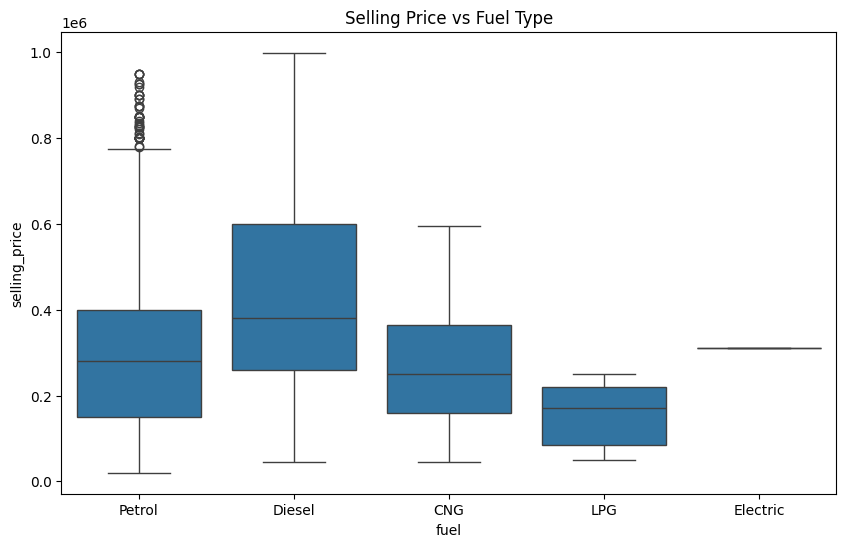

In [73]:
# Selling Price vs Fuel
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price vs Fuel Type')
plt.savefig('plots/price_vs_fuel.png')
plt.show()
plt.close()

### **Selling Price vs Fuel Type**
- Diesel cars show the highest median price and the widest spread, indicating both budget and premium options.  
- Petrol and CNG have moderate prices, while LPG is lowest, reflecting cheaper models.  
- Electric has a single value or very few points, so insights are not statistically reliable.

# Multivariate Analysis

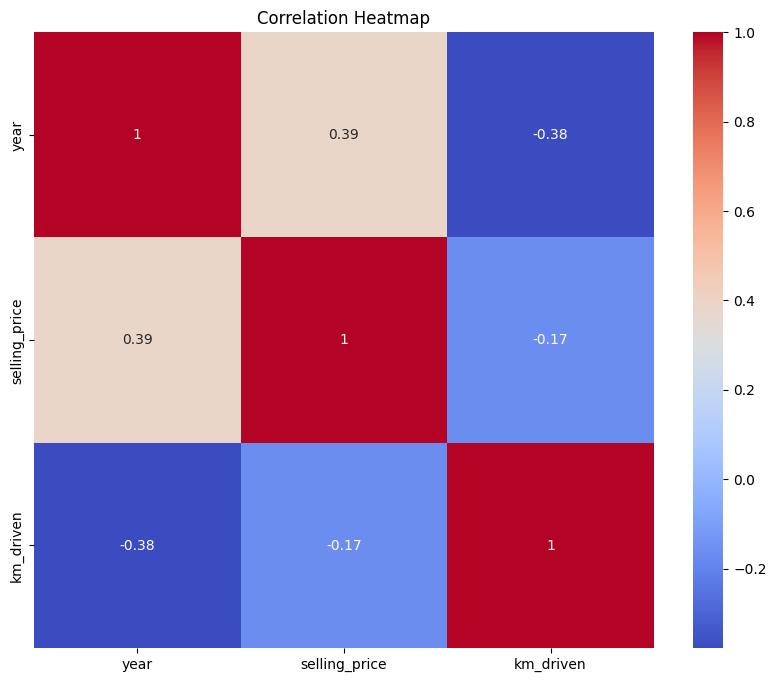

In [61]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('plots/correlation_heatmap.png')
plt.show()
plt.close()

### **Correlation Heatmap**
- Selling price has a moderate positive correlation with year (newer cars → higher price).  
- KM driven is moderately negatively correlated with both year and price (older, high-mileage cars → lower price).  
- Overall correlations are meaningful but not strong, indicating multiple factors influence pricing.


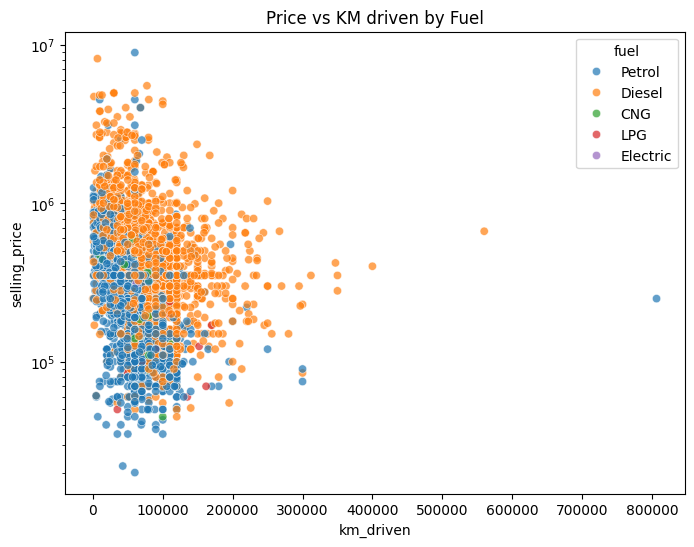

In [62]:
# Scatterplot of Price vs KM driven by Fuel
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='fuel', alpha=0.7)
plt.yscale('log')
plt.title("Price vs KM driven by Fuel")
plt.savefig("plots/price_vs_km_driven_by_fuel.png")
plt.show()

### **Price vs KM Driven by Fuel**
- Clear downward trend: higher mileage generally lowers selling price across all fuel types.  
- Diesel vehicles dominate the higher-price range, even at moderate mileage.  
- Petrol and CNG cluster tightly at lower prices, while extreme outliers appear mostly in Diesel.

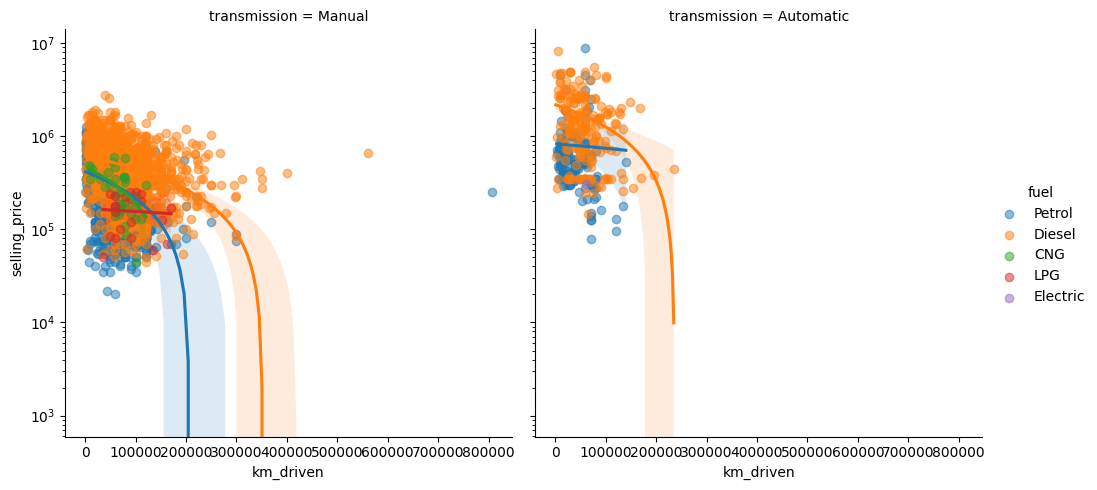

In [63]:
# Price vs KM Driven with Fuel Type and Transmission 
sns.lmplot(data=df, x='km_driven', y='selling_price', hue='fuel', col='transmission',
           height=5, aspect=1, scatter_kws={'alpha':0.5})
plt.yscale('log')
plt.savefig('plots/price_vs_km_driven.png')
plt.show()

### **Price vs KM Driven by Transmission**
- Manual cars show a wider spread in both mileage and price, reflecting larger market diversity.  
- Automatic cars are generally higher priced but cluster within lower mileage ranges.  
- Diesel dominates the high-price region in both transmissions, while Petrol remains mostly mid-range.

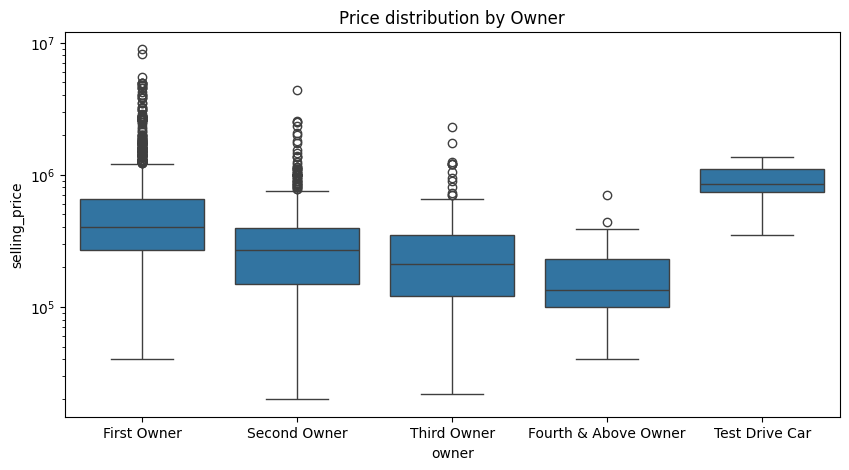

In [64]:
# Price Distribution by Owner
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='owner', y='selling_price')
plt.yscale('log')
plt.title("Price distribution by Owner")
plt.savefig("plots/price_distribution_by_owner.png")
plt.show()

### **Price Distribution by Owner**
- First Owner cars have the highest median price, with many high-value outliers.  
- Price decreases steadily as the number of previous owners increases.  
- Test Drive Cars show consistently high prices, suggesting they are nearly new or premium models.


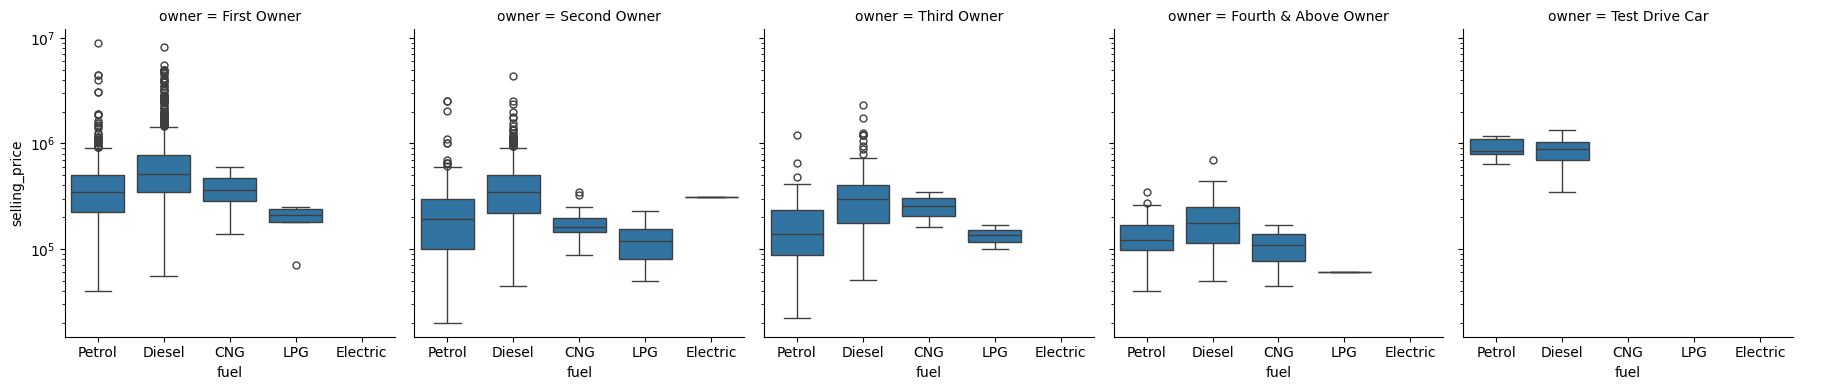

In [65]:
# Boxplot of Selling Price by Fuel Type and Owner Type
sns.catplot(data=df, x='fuel', y='selling_price', col='owner', kind='box', height=4, aspect=0.9)
plt.yscale('log')
plt.savefig('plots/selling_price_boxplot.png')
plt.show()

### **Selling Price by Fuel Type Across Owner Categories**
- Diesel consistently has the highest median price across all owner groups, followed by Petrol.  
- Price drops noticeably with each additional owner, regardless of fuel type.  
- Test Drive Cars show uniformly high prices for both Petrol and Diesel, indicating near-new condition.


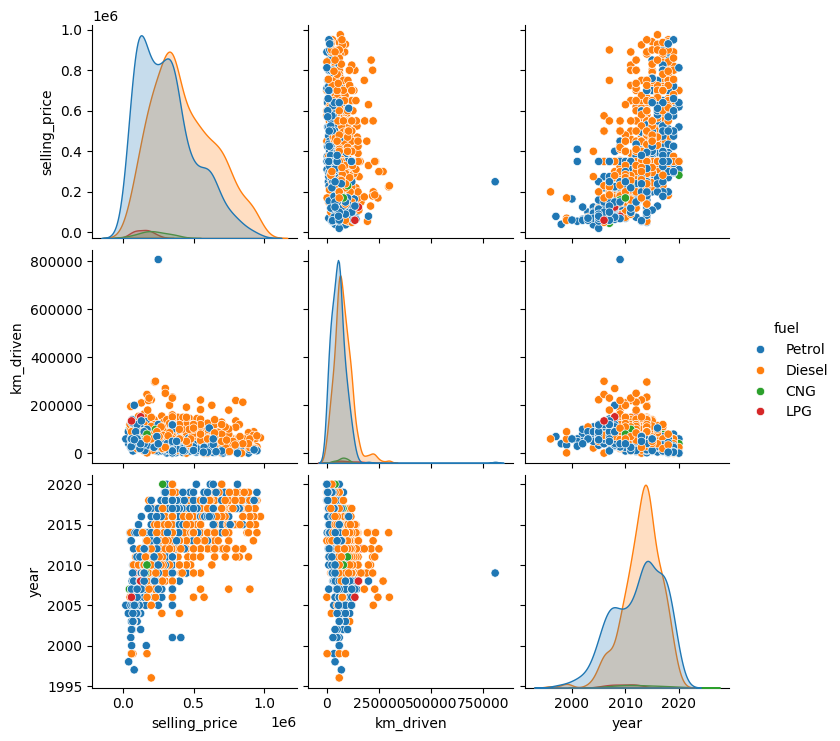


EDA completed. Plots saved in 'plots' directory.


In [ ]:
# Pairplot for selling_price, km_driven, year, fuel
df = df[df['selling_price'] < 1000000]
sample = df.sample(1000, random_state=1)
sns.pairplot(sample[['selling_price','km_driven','year', 'fuel']], hue='fuel', diag_kind='kde')
plt.savefig('plots/pairplot.png')
plt.show()

### **Pairplot (Selling Price, KM Driven, Year) by Fuel Type**
- Diesel cars tend to be newer and higher-priced, while Petrol spans a wider range of ages and prices.  
- KM driven shows a similar spread for Petrol and Diesel, but outliers are more common in Diesel.  
- Clear positive relationship between year and price, and negative relationship between mileage and price across all fuels.

> EDA completed. Plots saved in `plots` directory.

# Save Cleaned Data

In [67]:
df.to_csv('cleaned_car_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_car_data.csv'")


Cleaned data saved to 'cleaned_car_data.csv'


In [68]:
df_cleaned = pd.read_csv('cleaned_car_data.csv')
df_cleaned

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,350000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2014,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3417,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2014,600000.0,170000.0,Diesel,Individual,Manual,First Owner
3418,Hyundai i20 Magna 1.4 CRDi,2014,409999.0,80000.0,Diesel,Individual,Manual,Second Owner
3419,Maruti 800 AC BSIII,2009,110000.0,83000.0,Petrol,Individual,Manual,Second Owner
3420,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000.0,Diesel,Individual,Manual,First Owner
